> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Looking at Video Game Sales

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [11]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline




# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [12]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
# I got my dataset from Kaggle
df = pd.read_csv('vgsales.csv')
df.head(1000)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16598 non-null int64
Genre           16598 non-null object
Publisher       16598 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [14]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.138571,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,6.143743,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [15]:
for i, v in enumerate(df.columns):
    print(i, v)

0 Rank
1 Name
2 Platform
3 Year
4 Genre
5 Publisher
6 NA_Sales
7 EU_Sales
8 JP_Sales
9 Other_Sales
10 Global_Sales


In [16]:
df.nunique()

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         579
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

In [17]:
sum(df.duplicated())

0

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Making a few Modifications)

### Base on ".info()" method, there isn't any null values in each of the columns but I will get rid of all the '_sales' of each of the columns since we know that we are dealing with sales.

In [18]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# I will get rid of all the '_sales' of each of the columns since we know that we are dealing with sales.
new_labels = []
for col in df.columns:
    if '_Sales' in col:
        new_labels.append(col[:-6])  # exclude last 6 characters
    else:
        new_labels.append(col)
new_labels

['Rank',
 'Name',
 'Platform',
 'Year',
 'Genre',
 'Publisher',
 'NA',
 'EU',
 'JP',
 'Other',
 'Global']

In [19]:
#Check to see if the labels are correctly published.
df.columns = new_labels
df.head(1)

,Rank,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Global
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Question: Does certain genre of games sell better in countries (Japan, North America, Europe)?

## I wanted to campare the sales for each genre for Japan, North America, and Europe

Text(0,0.5,'Sales')

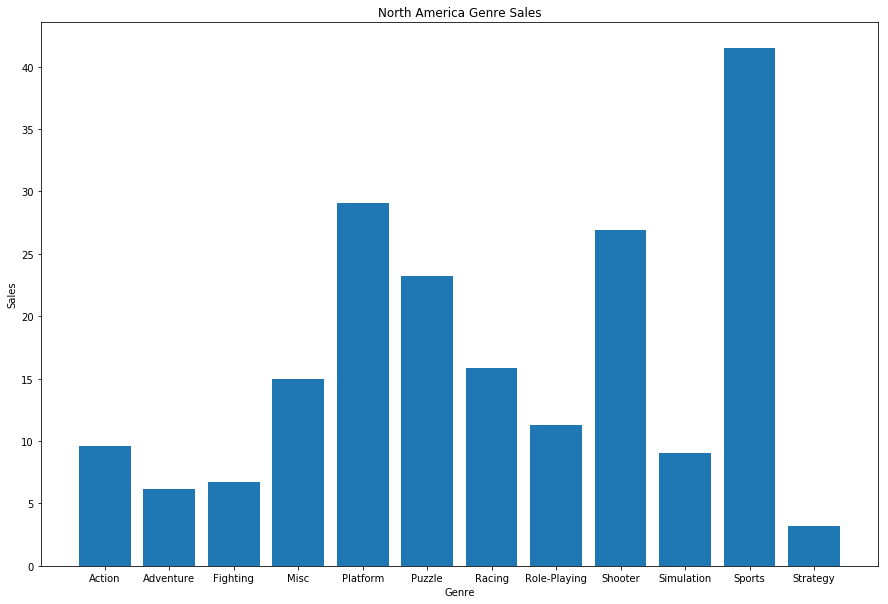

In [27]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
x = df['Genre']
y = df['NA']



plt.figure(figsize= (15,10))

plt.bar(x , y)
plt.title('North America Genre Sales')
plt.xlabel('Genre')
plt.ylabel('Sales')


### Sports has the highest sales with platform second.

Text(0,0.5,'Sales')

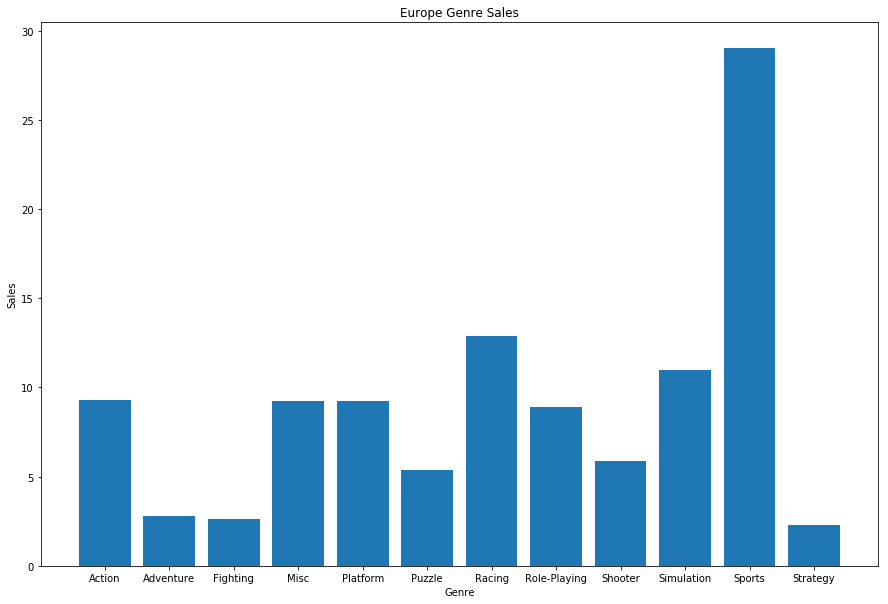

In [21]:
x = df['Genre']
y = df['EU']



plt.figure(figsize= (15,10))

plt.bar(x , y)
plt.title('Europe Genre Sales')
plt.xlabel('Genre')
plt.ylabel('Sales')


### Sports games also reach very high sales with Racing in second for Europe.

Text(0,0.5,'Sales')

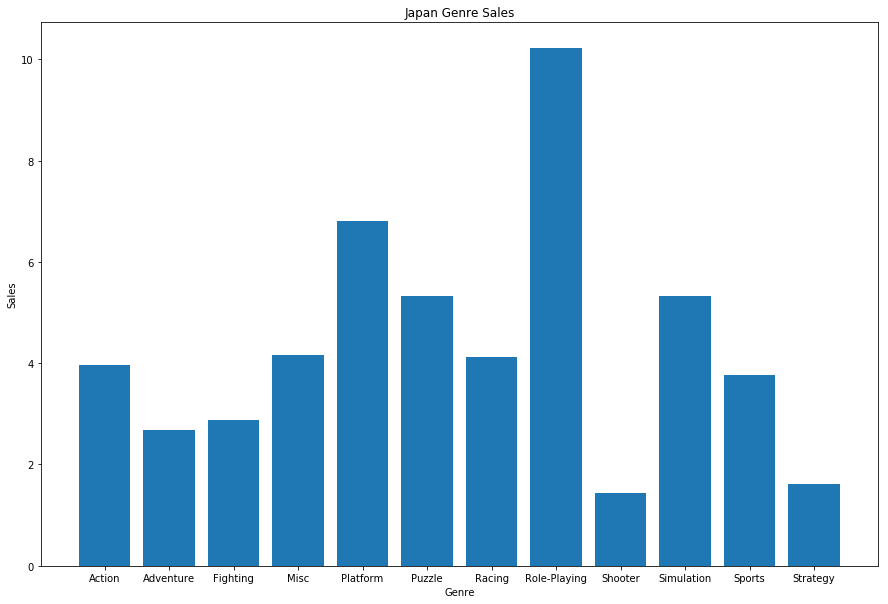

In [22]:
x = df['Genre']
y = df['JP']



plt.figure(figsize= (15,10))

plt.bar(x , y)
plt.title('Japan Genre Sales')
plt.xlabel('Genre')
plt.ylabel('Sales')


### But in Japan, Role-Playing games are more popular with platform coming in second.

### Quick Observation to note: 
##### There a lot more higher sales in North America, with Europe in the middle, and Japan having the least sales overall.

### Research Question 2: As the years go by and people sell of games increase, is there a increase of game development?

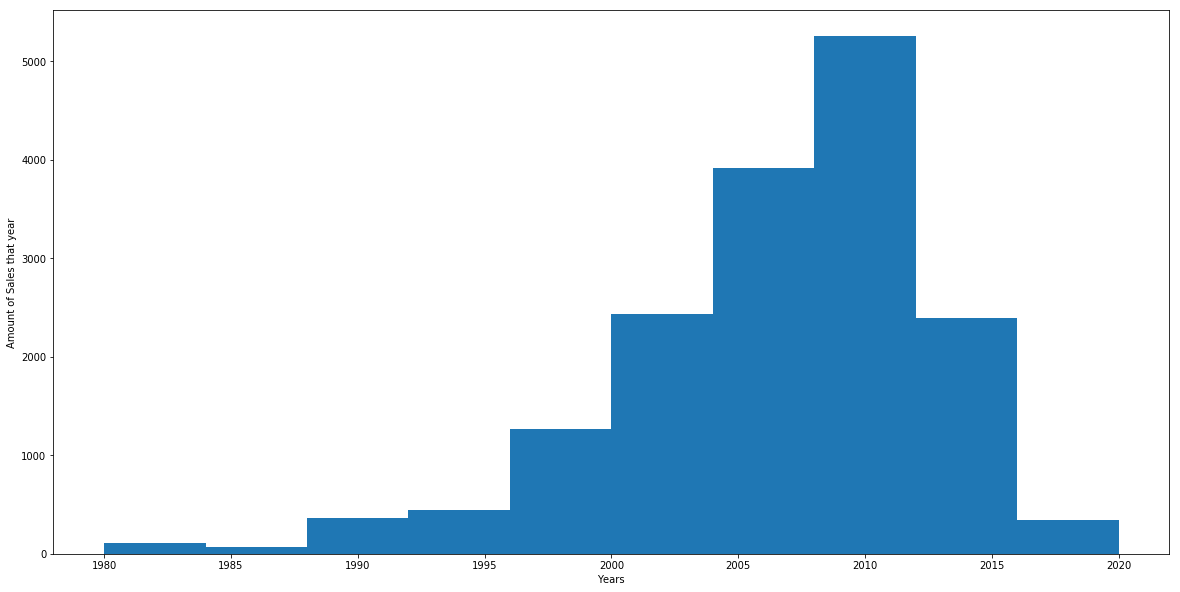

In [37]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
x= df['Year']
y= df['NA']
plt.figure(figsize=(20,10))
plt.xlabel('Years')
plt.ylabel('Amount of Sales that year')
plt.hist(x,)
plt.show()

## Result showing a skewed left plot. 

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

## Base on my findings, it seems different genres of games do well in different regions of the world. For example making a role-playing game in Japan, have higher sales than making a shooter. Not to say that you won't do well if you do develop a shooting game there may be chance that you won't sale as many. This is a indication of the general public interest of what type of games they may like. Making sports games in North America and Europe may produce higher sales. There will be many games that will succeed in sales even if that genre of the game is not as popular in that country. I do have to put in consideration of how fast a genre of games are being produce by companies. 

##  Around 2005 - 2015 seem like the pinnacle of gaming sales. 

## No statistical work hasn't been implemented in my findings.  There is many variables that could play part that is not in this dataset but this is a start to looking at other datasets. 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])